# Validation for incidence data inference

## Test 1

This test involves simulating a trajectory, then comparing parameter posteriors generated from the incidence data with those generated using a tree sampler without sequence data.

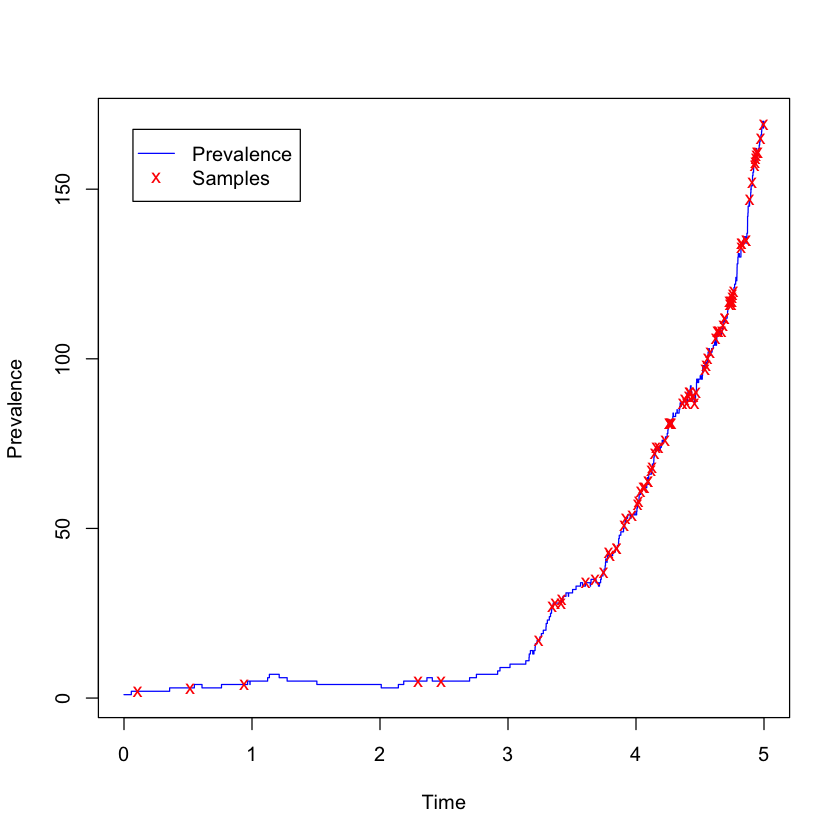

In [21]:
df <- read.table("simulated.traj", header=T)
plot(df$t, df$I, 's', col='blue',
    xlab="Time",
    ylab="Prevalence")
sampIdx <- which(df$eventType=="PSI_SAMPLE_NOREMOVE")
points(df$t[sampIdx], df$I[sampIdx], pch='x', col='red')
legend('topleft', inset=0.05, c("Prevalence", "Samples"),
       lty=c(1,0),
       pch=c('','x'),
       col=c("blue","red"))

Posteriors for $\beta$ should be independent of the sequencing fraction:

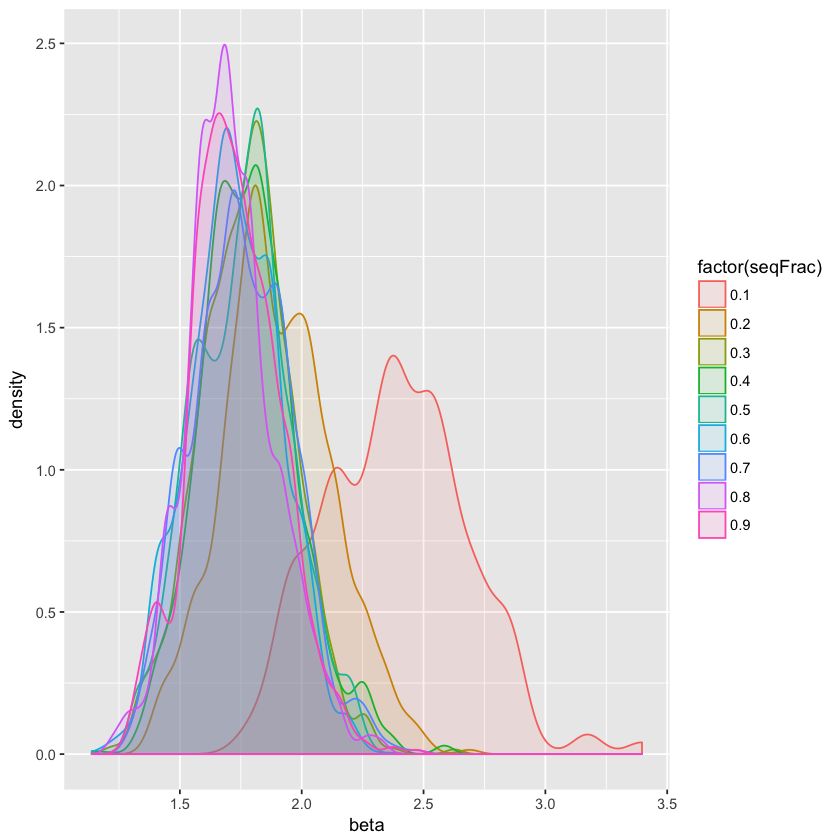

In [30]:
require(plyr)
require(ggplot2)

removeBurnin <- function(df, burninFrac=0.1) {
    N <- dim(df)[1]
    return(df[-(1:ceiling(burninFrac*N)),])
}

seqFracs <- seq(0.1,0.9,by=0.1)

dfs <- NULL
for (i in 1:length(seqFracs)) {
    seqFrac <- seqFracs[i]
    dfs[[i]] <- removeBurnin(read.table(
        paste0("BD_inference.",seqFrac,".log"), header=T))
    dfs[[i]]$seqFrac <- seqFrac
}

df <- rbind.fill(dfs)

ggplot(df) + geom_density(aes(beta,
                              colour=factor(seqFrac), 
                              fill=factor(seqFrac)),
                              alpha=0.1)

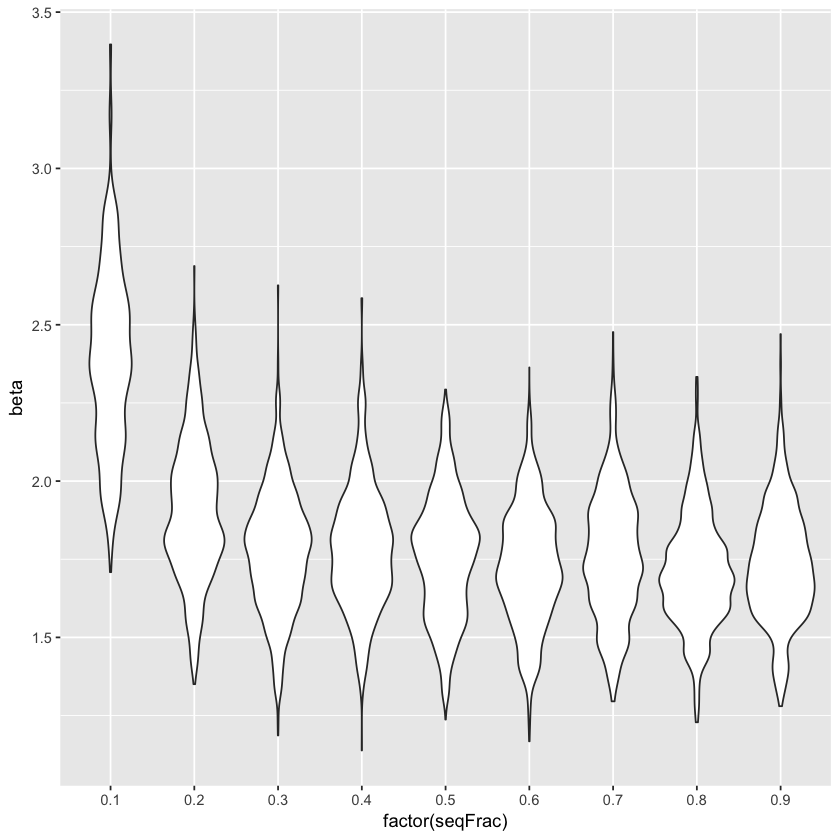

In [31]:
ggplot(df) + geom_violin(aes(factor(seqFrac), beta))